In [3]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
randnums = np.random.randint(100,size=(10,))
print randnums

[27 53 11 96 72 88 96 71 75 77]


In [5]:
sortind = np.argsort(randnums)
print sortind

[2 0 1 7 4 8 9 5 3 6]


In [6]:
sortind[-3:]

array([5, 3, 6])

In [7]:
randnums[sortind[-3:]]

array([88, 96, 96])

In [8]:
data = [1, 0.5,0.5,0.5,100,200,300,400]
labels = ['k','accuracy','recall','precision','TP','TN','FN','FP']

In [9]:
ser1 = pd.DataFrame(data=data,index=labels).T

In [10]:
print ser1


     k  accuracy  recall  precision     TP     TN     FN     FP
0  1.0       0.5     0.5        0.5  100.0  200.0  300.0  400.0


In [11]:
df = pd.DataFrame()
for i in xrange(5):
    df = df.add(ser1)
    
print df

    k  accuracy  recall  precision  TP  TN  FN  FP
0 NaN       NaN     NaN        NaN NaN NaN NaN NaN


In [12]:
df = pd.DataFrame(columns=labels)
for i in xrange(5):
    df.loc[i] = data
    
print df

     k  accuracy  recall  precision     TP     TN     FN     FP
0  1.0       0.5     0.5        0.5  100.0  200.0  300.0  400.0
1  1.0       0.5     0.5        0.5  100.0  200.0  300.0  400.0
2  1.0       0.5     0.5        0.5  100.0  200.0  300.0  400.0
3  1.0       0.5     0.5        0.5  100.0  200.0  300.0  400.0
4  1.0       0.5     0.5        0.5  100.0  200.0  300.0  400.0


In [13]:
path = '../../data/varying_K_on_cross_val.csv'
df = pd.read_csv(path)

In [14]:
df.columns

Index([u'Unnamed: 0', u'k', u'accuracy', u'recall', u'precision', u'TP', u'TN',
       u'FN', u'FP'],
      dtype='object')

In [15]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [16]:
df

,k,accuracy,recall,precision,TP,TN,FN,FP
0,0.0,0.4966,0.000000,NaN,0.0,4966.0,5034.0,0.0
1,1.0,0.5611,0.879420,0.539286,4427.0,1184.0,607.0,3782.0
2,2.0,0.6462,0.697855,0.635262,3513.0,2949.0,1521.0,2017.0
3,3.0,0.6726,0.543107,0.737325,2734.0,3992.0,2300.0,974.0
4,4.0,0.6537,0.408621,0.808887,2057.0,4480.0,2977.0,486.0
5,5.0,0.6307,0.309893,0.876897,1560.0,4747.0,3474.0,219.0
6,6.0,0.5935,0.213945,0.908861,1077.0,4858.0,3957.0,108.0
7,7.0,0.5595,0.132499,0.946099,667.0,4928.0,4367.0,38.0
8,8.0,0.5334,0.075487,0.969388,380.0,4954.0,4654.0,12.0
9,9.0,0.5156,0.038141,0.989691,192.0,4964.0,4842.0,2.0


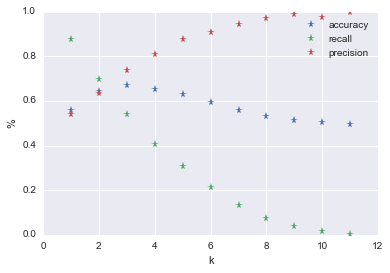

In [66]:
x = df.k.values[1:12]

for col in df.columns[1:4]:
    plt.plot(x,df[col].values[1:12],'*',label=col,markersize=8)

plt.legend()
plt.xlabel('k')
plt.ylabel('%')

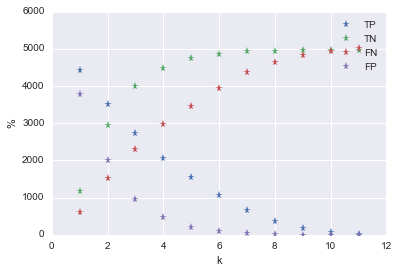

In [67]:
for col in df.columns[4:]:
    plt.plot(x,df[col].values[1:12],'*',label=col,markersize=8)

plt.legend()
plt.xlabel('k')
plt.ylabel('%')

In [67]:
def build_roc(df):
    
    df['TPR'] = df['recall']
    df['FPR'] = df['FP']/(df['FP'] + df['TN'])
    
    plt.plot([0,1],[0,1],'k',linewidth=0.5)
    
    plt.plot(df.FPR.values,df.TPR.values,'r*',markersize=7)
    plt.xlabel('FPR')
    plt.xlim([0,1])
    plt.ylabel('TPR')
    plt.ylim([0,1])
    titlestr = "AUC: {}".format(np.trapz(df.TPR.values[::-1],x=df.FPR.values[::-1]))
    plt.title(titlestr)
    
#     print "TPR: ",df.TPR
#     print "FPR: ",df.FPR
    
    

/home/mgupta/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/mgupta/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


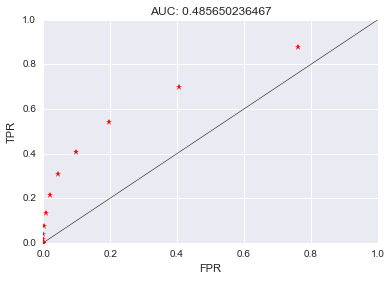

In [73]:
build_roc(df.loc[1:,:])

In [51]:
df.TPR.values[::-1]

AttributeError: 'DataFrame' object has no attribute 'TPR'

In [71]:
def seperatePunct(incomingString):
    newstring = incomingString
    newstring = newstring.replace("!"," ! ")
    newstring = newstring.replace("@"," @ ")
    newstring = newstring.replace("#"," # ")
    newstring = newstring.replace("$"," $ ")
    newstring = newstring.replace("%"," % ")
    newstring = newstring.replace("^"," ^ ")
    newstring = newstring.replace("&"," & ")
    newstring = newstring.replace("*"," * ")
    newstring = newstring.replace("("," ( ")
    newstring = newstring.replace(")"," ) ")
    newstring = newstring.replace("+"," + ")
    newstring = newstring.replace("="," = ")
    newstring = newstring.replace("?"," ? ")
    newstring = newstring.replace("\'"," \' ")
    newstring = newstring.replace("\""," \" ")
    newstring = newstring.replace("{"," { ")
    newstring = newstring.replace("}"," } ")
    newstring = newstring.replace("["," [ ")
    newstring = newstring.replace("]"," ] ")
    newstring = newstring.replace("<"," < ")
    newstring = newstring.replace(">"," > ")
    newstring = newstring.replace("~"," ~ ")
    newstring = newstring.replace("`"," ` ")
    newstring = newstring.replace(":"," : ")
    newstring = newstring.replace(";"," ; ")
    newstring = newstring.replace("|"," | ")
    newstring = newstring.replace("\\"," \\ ")
    newstring = newstring.replace("/"," / ")
    return newstring

In [72]:
def seperatePunct2(incomingString):
    outstr = ''
    characters = set(['!','@','#','$',"%","^","&","*",":","\\",
                  "(",")","+","=","?","\'","\"",";","/",
                  "{","}","[","]","<",">","~","`","|"])
    
    for char in incomingString:
        if char in characters:
            outstr = outstr + ' ' + char + ' '
        else:
            outstr = outstr + char
            
    return outstr

In [76]:
cases = ['dsfj"kfl', '"lsfkd','fldsjfk"','lsfjdksf""fjdslf', '"lsfkd','fldsjfk"', 
        'dsfj"kfl "lsfkd fldsjfk" lsfjdksf""fjdslf  "lsfkd fldsjfk"',]

for case in cases:
    print seperatePunct2(case).split(' ')
    print ""

['dsfj', '"', 'kfl']

['', '"', 'lsfkd']

['fldsjfk', '"', '']

['lsfjdksf', '"', '', '"', 'fjdslf']

['', '"', 'lsfkd']

['fldsjfk', '"', '']

['dsfj', '"', 'kfl', '', '"', 'lsfkd', 'fldsjfk', '"', '', 'lsfjdksf', '"', '', '"', 'fjdslf', '', '', '"', 'lsfkd', 'fldsjfk', '"', '']

